In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis -- this time from SentiWords module

In [1]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)
sns.set_palette("viridis")

In [2]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_sentiwords_3_15_2024_transgender.csv", low_memory=False)
print(df)
df = df.sort_values("Textbook")

print(df)

                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103
234  Spcl_Turnbull_06_Transgender.docx  0.002165
235  Spcl_Turnbull_07_Transgender.docx -0.032895
236  Spcl_Turnbull_08_Transgender.docx  0.084433
237    Spcl_Vaughn_07_Transgender.docx  0.085903

[238 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064

,Mean,Standard Deviation
Field,,
Abn,-0.049356,0.036306
Devo,0.068915,0.031883
GS,0.024352,0.025680
HS,0.052986,0.019895
Intro,0.054217,0.040978
Neuro,0.023081,0.063885
Socl,0.053028,0.030340
Spcl,0.025191,0.062939


F_onewayResult(statistic=30.862002638688693, pvalue=6.177359766528637e-30)


group1,group2,meandiff,p-adj,lower,upper,reject
Abn,Devo,0.1183,0.0,0.0903,0.1462,True
Abn,GS,0.0737,0.0,0.0426,0.1048,True
Abn,HS,0.1023,0.0,0.0688,0.1359,True
Abn,Intro,0.1036,0.0,0.0759,0.1312,True
Abn,Neuro,0.0724,0.0,0.0398,0.105,True
Abn,Socl,0.1024,0.0,0.071,0.1338,True
Abn,Spcl,0.0745,0.0,0.041,0.1081,True
Devo,GS,-0.0446,0.0004,-0.0753,-0.0138,True
Devo,HS,-0.0159,0.8251,-0.0492,0.0173,False
Devo,Intro,-0.0147,0.7198,-0.042,0.0126,False


                              Textbook     Score    Author Field
0    Abn_Barlow_04_Transgender_v2.docx -0.022799    Barlow   Abn
1    Abn_Barlow_05_Transgender_v2.docx -0.025626    Barlow   Abn
2    Abn_Barlow_06_Transgender_v2.docx  0.006369    Barlow   Abn
3    Abn_Barlow_07_Transgender_v2.docx -0.062992    Barlow   Abn
4       Abn_Barlow_08_Transgender.docx -0.009465    Barlow   Abn
..                                 ...       ...       ...   ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103  Turnbull  Spcl
234  Spcl_Turnbull_06_Transgender.docx  0.002165  Turnbull  Spcl
235  Spcl_Turnbull_07_Transgender.docx -0.032895  Turnbull  Spcl
236  Spcl_Turnbull_08_Transgender.docx  0.084433  Turnbull  Spcl
237    Spcl_Vaughn_07_Transgender.docx  0.085903    Vaughn  Spcl

[238 rows x 4 columns]


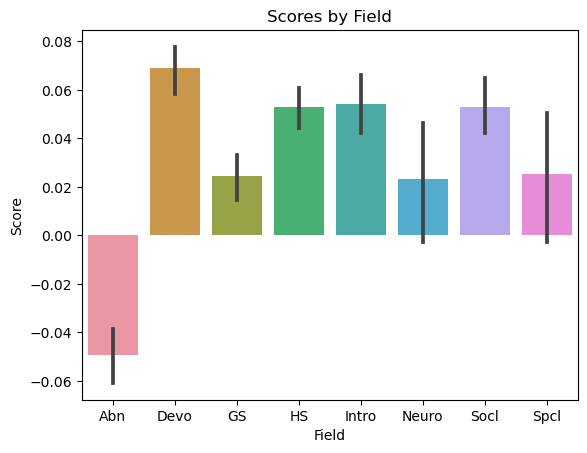

In [3]:
# Field Analysis

# Break up the data frame into fields

field_df = df

fields = ["Abn", "Devo", "GS", "HS", "Intro", "Neuro", "Socl", "Spcl"]

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", 
                 "Gonzalez-Mena", "Haines", "Franzoi", "Kassin", "Andersen", "Brannon", "Healey", "Helgeson", "Kimmel", "Robinson", 
                 "Greenberg", "Hock", "Yarber"]



for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# mean = field_df.groupby('Field')['Score'].mean()
# std = field_df.groupby('Field')['Score'].std()

# Find means

field_intermediary_df = field_df[["Score", "Field"]]
field_means_df = field_intermediary_df.groupby(["Field"]).mean()
field_means_df = field_means_df.rename(columns={"Score":"Mean"})
field_stdev_df = field_intermediary_df.groupby(["Field"]).std()
field_stdev_df = field_stdev_df.rename(columns={"Score":"Standard Deviation"})


field_stats_df = pd.concat([field_means_df, field_stdev_df], axis="columns")

display(field_stats_df)

# Do ANOVA

# print(field_df[field_df['Field'] == 'Devo']["Score"])

anova = f_oneway(field_df[field_df['Field'] == 'Abn']["Score"], field_df[field_df['Field'] == 'Devo']['Score'],
        field_df[field_df['Field'] == 'GS']['Score'], field_df[field_df['Field'] == 'HS']['Score'],
        field_df[field_df['Field'] == 'Intro']['Score'], field_df[field_df['Field'] == 'Neuro']['Score'], 
        field_df[field_df['Field'] == 'Socl']['Score'], field_df[field_df['Field'] == 'Spcl']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(df['Score'], df['Field'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())


fig, ax = plt.subplots()

print(field_df)

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.bar_label(ax.containers[0], fontsize=10);

# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")

plt.savefig('fields_transgender_sentiwords.png')

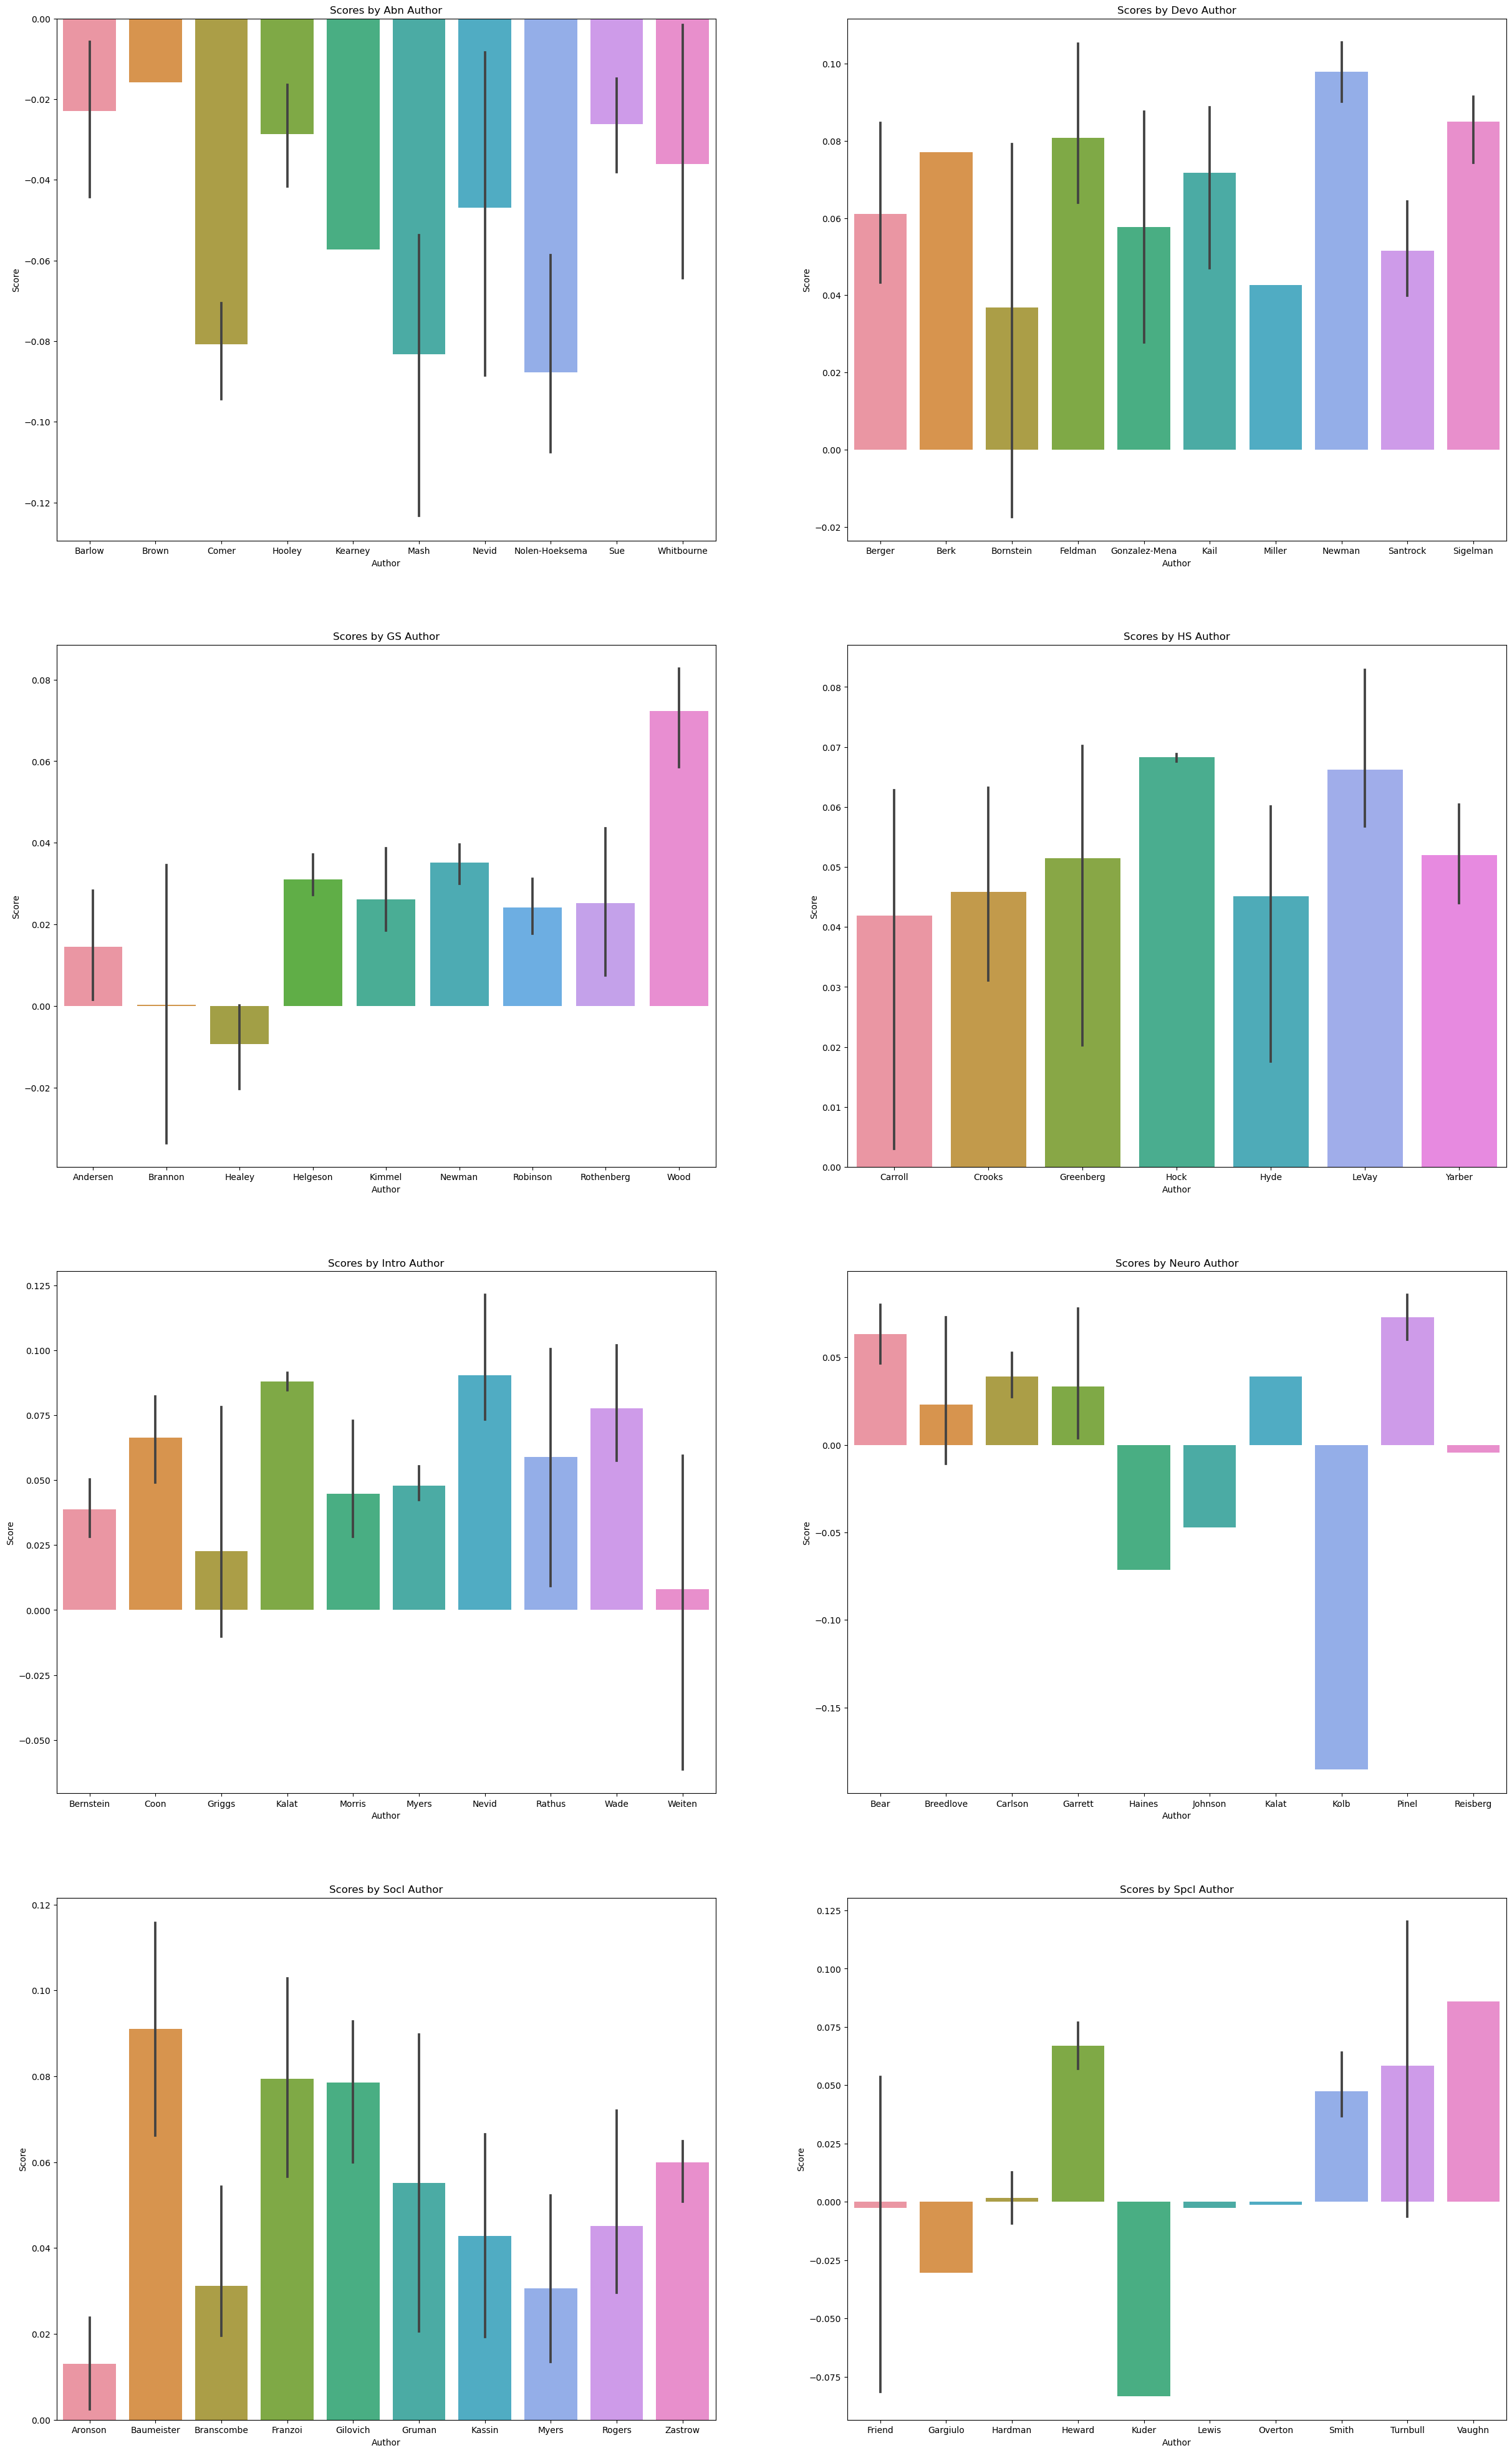

In [4]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_transgender_" + str(counter) + "_" + str(subcounter) + "_sentiwords.png"
#         ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.20))
    counter += 1


In [6]:
# # Edition Analysis

# edition_df = df

# # Cut up dataframe into chunks by author

# all_editions = []
# author_total = []
# test = []
# slope = []
# for a_df in all_authors:
#     author_name = ""
#     alphabetical = a_df["Textbook"].str.split("_").values 
#     editions = [] # Get only the edition
#     for l in alphabetical:
#         editions.append(l[2])
#         all_editions.append(l[2])
#         author_name = l[0] + "_" + l[1]
#         author_total.append(author_name)
#     test.append(editions)
#     a_df.loc[:,"Edition"] = editions
#     a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
#     a_df = a_df.sort_values("Edition")
#     if len(a_df["Edition"]) > 0:
#         res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
#         for l in alphabetical:
#             if len(alphabetical) > 1:
#                 slope.append(res.slope)
#             else:
#                 slope.append(0)

# edition_df["Edition"] = all_editions
# edition_df["Author"] = author_total
# edition_df["Slope"] = slope
# print(edition_df)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# # Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

# high = edition_df[edition_df["Slope"] > 0.055]
# high = high.sort_values("Edition")
# sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high, sort=False)

# low = edition_df[edition_df["Slope"] <= -0.055]
# h = sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# plt.show()


C:\Users\maksi\AppData\Local\Temp\ipykernel_836\172732561.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_836\172732561.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_st

[]


<Axes: >

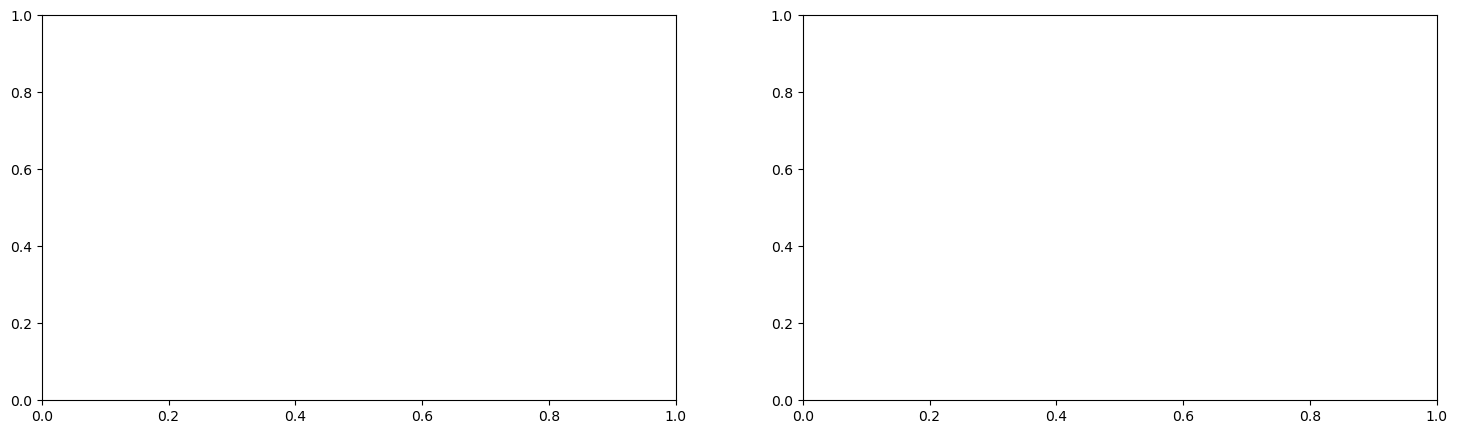

In [5]:
# Edition Analysis

edition_df = df


# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
    if len(a_df["Edition"]) > 0:
        res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
        for l in alphabetical:
            if len(alphabetical) > 1:
                slope.append(res.slope)
            else:
                slope.append(0)

edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope

# Find consistently positive/negative authors
author_dfs = []
authors = edition_df["Author"].unique()
for author in authors:
    single_author_df = edition_df[edition_df["Author"] == author]
    if single_author_df["Score"].mean() > 1 or single_author_df["Score"].mean() < -1: # if they're consistent, their means will be above or below also
        author_dfs.append(single_author_df)
        
print(author_dfs)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] >= 1]
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -1]
sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# positive = 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.408
Method:                 Least Squares   F-statistic:                              16.19
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    0.000614
Time:                        20:27:02   Log-Likelihood:                          46.953
No. Observations:                  22   AIC:                                     -91.91
Df Residuals:                      21   BIC:                                     -90.82
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year        1.253e-05   3.11e-06      4.023      0.001    6.05e-06     1.9e-05
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.535
Skew:                          -1.280   Prob(JB):                      0.00850
Kurtosis:                       4.962   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.408
Method:                 Least Squares   F-statistic:                              16.19
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    0.000614
Time:                        20:27:02   Log-Likelihood:                          46.953
No. Observations:                  22   AIC:                                     -91.91
Df Residuals:                      21   BIC:                                     -90.82
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

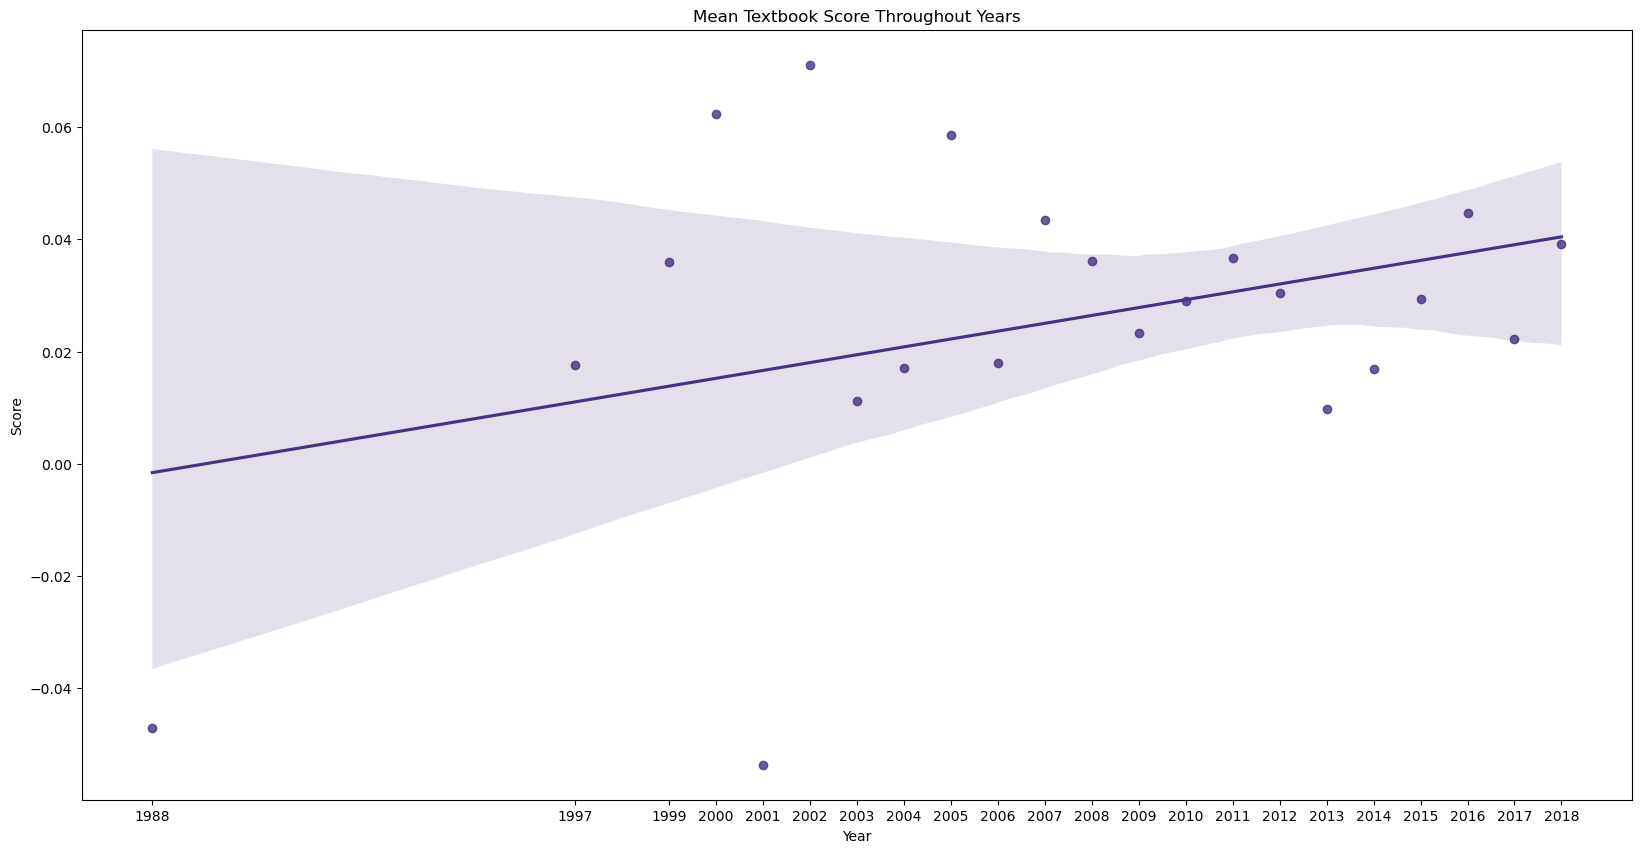

In [6]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Transgender"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    

# Find mean of the books in each year

year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]
    
# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

model = sm.OLS(graphing_years["Score"], graphing_years["Year"])
results = model.fit()
display(results.summary())

print(results.summary())
print(results.params)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years);

ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")
plt.savefig('years_transgender_sentiwords.png')

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              72.83
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    1.50e-07
Time:                        20:29:13   Log-Likelihood:                          43.156
No. Observations:                  18   AIC:                                     -84.31
Df Residuals:                      17   BIC:                                     -83.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.267e-05   2.66e-06     -8.534      0.000   -2.83e-05   -1.71e-05
==============================================================================
Omnibus:                       10.986   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.983
Skew:                           1.368   Prob(JB):                       0.0185
Kurtosis:                       4.777   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              54.45
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    1.56e-06
Time:                        20:29:13   Log-Likelihood:                          33.374
No. Observations:                  17   AIC:                                     -64.75
Df Residuals:                      16   BIC:                                     -63.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.121e-05   4.23e-06      7.379      0.000    2.22e-05    4.02e-05
==============================================================================
Omnibus:                       17.631   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.104
Skew:                          -1.702   Prob(JB):                     0.000117
Kurtosis:                       6.737   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              150.5
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    1.81e-06
Time:                        20:29:14   Log-Likelihood:                          26.963
No. Observations:                   9   AIC:                                     -51.93
Df Residuals:                       8   BIC:                                     -51.73
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.606e-05   2.12e-06     12.268      0.000    2.12e-05     3.1e-05
==============================================================================
Omnibus:                        4.548   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                1.848
Skew:                          -1.109   Prob(JB):                        0.397
Kurtosis:                       3.092   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              44.60
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    1.05e-05
Time:                        20:29:14   Log-Likelihood:                          32.884
No. Observations:                  15   AIC:                                     -63.77
Df Residuals:                      14   BIC:                                     -63.06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.399e-05   3.59e-06      6.678      0.000    1.63e-05    3.17e-05
==============================================================================
Omnibus:                        0.378   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.121
Skew:                          -0.198   Prob(JB):                        0.941
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.342
Model:                            OLS   Adj. R-squared (uncentered):              0.276
Method:                 Least Squares   F-statistic:                              5.193
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                      0.0459
Time:                        20:29:14   Log-Likelihood:                          18.600
No. Observations:                  11   AIC:                                     -35.20
Df Residuals:                      10   BIC:                                     -34.80
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.598e-05   7.01e-06      2.279      0.046    3.56e-07    3.16e-05
==============================================================================
Omnibus:                        6.118   Durbin-Watson:                   2.706
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                2.227
Skew:                          -0.888   Prob(JB):                        0.328
Kurtosis:                       4.307   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              58.41
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    0.000610
Time:                        20:29:14   Log-Likelihood:                          15.594
No. Observations:                   6   AIC:                                     -29.19
Df Residuals:                       5   BIC:                                     -29.40
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.056e-05      4e-06      7.642      0.001    2.03e-05    4.08e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.908
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.409
Skew:                           0.072   Prob(JB):                        0.815
Kurtosis:                       1.730   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.306
Method:                 Least Squares   F-statistic:                              4.977
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                      0.0562
Time:                        20:29:14   Log-Likelihood:                          16.338
No. Observations:                   9   AIC:                                     -30.68
Df Residuals:                       8   BIC:                                     -30.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.545e-05   6.92e-06      2.231      0.056    -5.2e-07    3.14e-05
==============================================================================
Omnibus:                        0.300   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.187
Skew:                           0.250   Prob(JB):                        0.911
Kurtosis:                       2.503   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

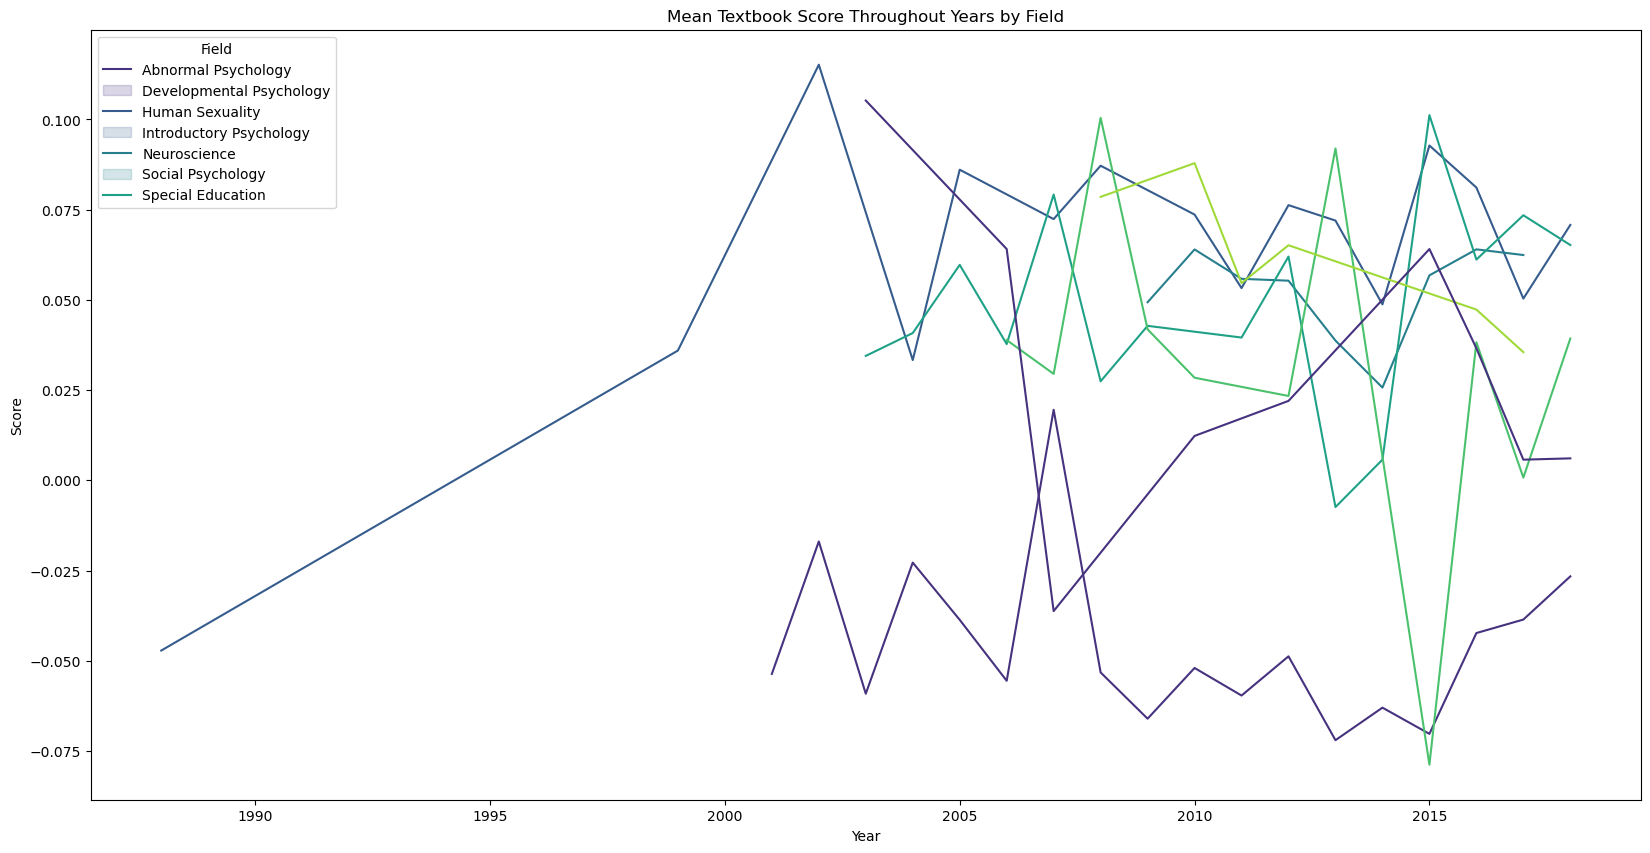

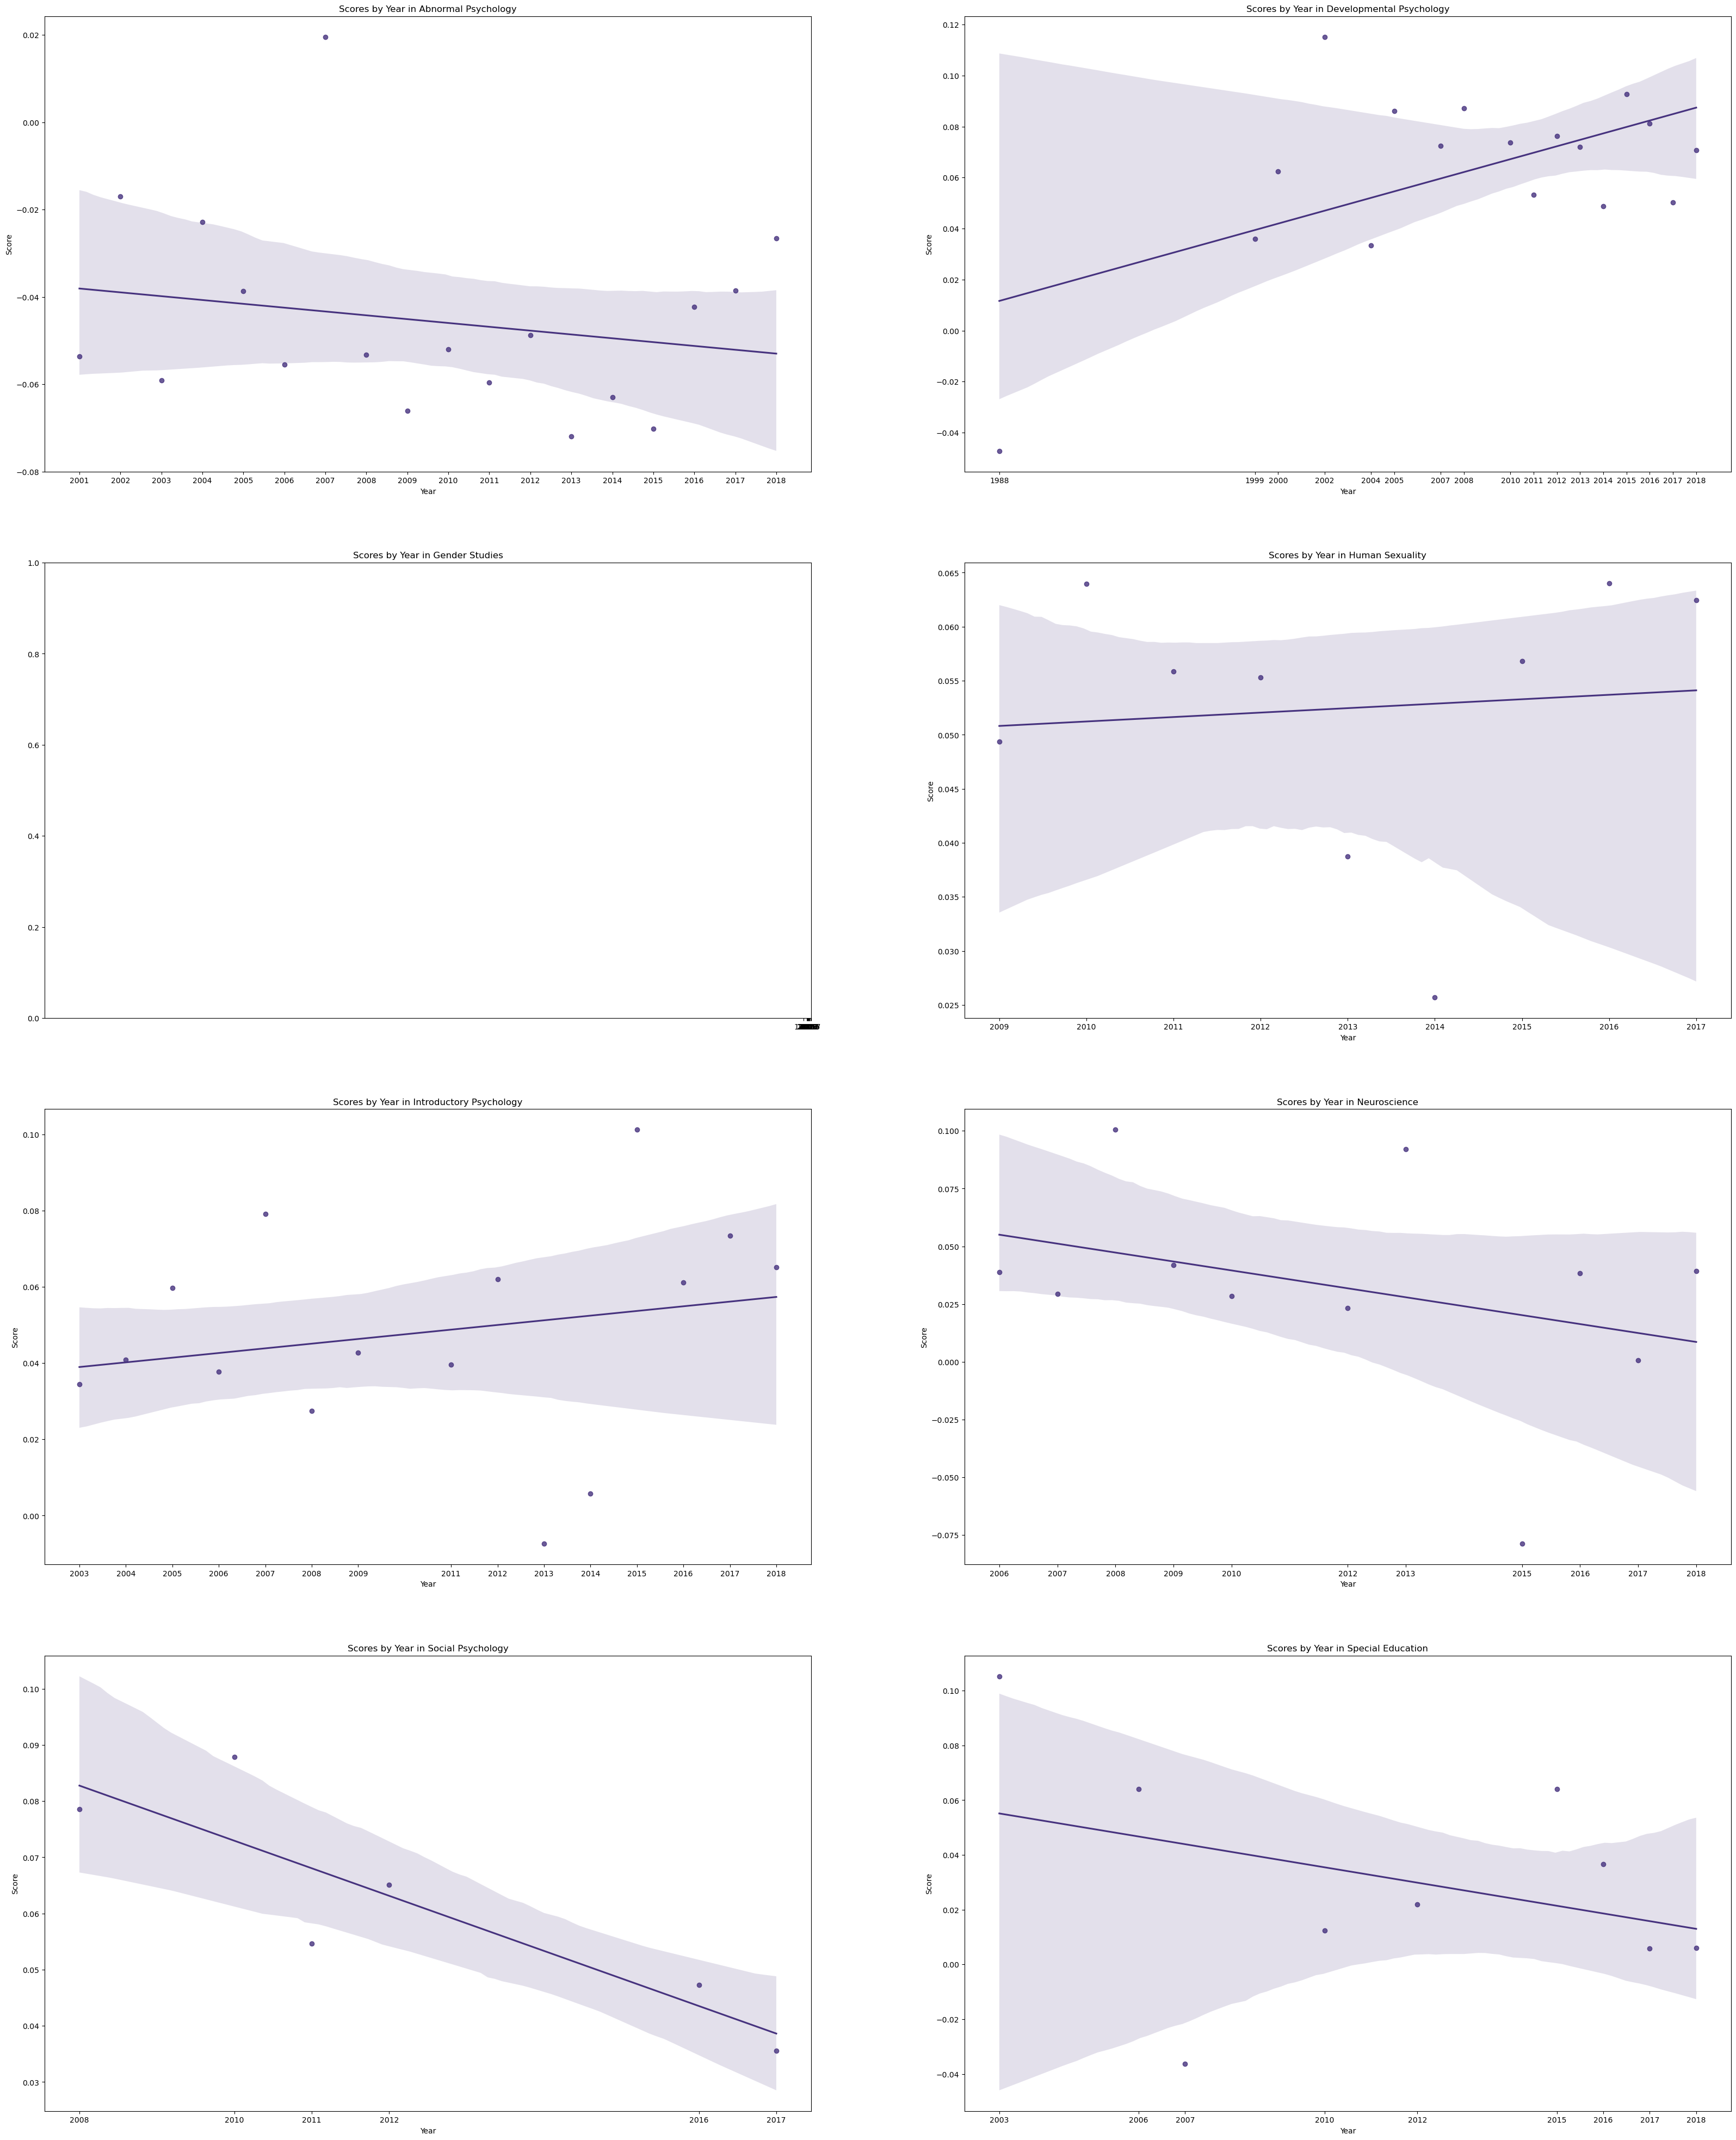

In [7]:
# Years by field

# Year Analysis

year_df = df

# Get a field from the big data frame
def getFieldDF(df, field):
    df1 = df[df['Field'] == field]
    return df1

# Get all the fields
fields = df.Field.unique()

# Make a list where each element is a dataframe with only one field
field_dfs = []
for f in fields:
    f_df = getFieldDF(year_df, f)
    field_dfs.append(f_df)


# print(field_dfs)

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Transgender"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year
        
# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books

def getYear(book_df):

    # Overall mean for each year, for all textbooks in a field

    # Find mean of the books in each year
    year_scores = {}
    for year in year_textbooks:
        book_list = year_textbooks[year]
        scores = []
        for book in book_list:
            # Find the book in the df
            string_to_query = "Textbook=='" + book + "'"
            score = book_df.query(string_to_query)["Score"]
            # If the score exists (that is, if the book is in this dataframe)
            if len(score) > 0:
                scores.append(float(score.iloc[0]))
        if len(scores) > 0:
            average = mean(scores)
            year_scores[year] = [year, average]
    
    return year_scores

# Get the years for each field dataframe
year_scores = []
for f_df in field_dfs:
#     print(f_df)
    year_score = getYear(f_df)
#     print(year_score)
    graphing_years = pd.DataFrame.from_dict(year_score, orient="index", columns=["Year", "Score"])
    graphing_years["Field"] = f_df["Field"].iloc[0] # Include the field
    graphing_years = graphing_years.reset_index()
    year_scores.append(graphing_years)

# Graph it




# print(year_scores)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[0])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[1])
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[3])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[4])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[5])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[6])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[7])

# ax.set_xticks(book_years.values())
ax.set_title("Mean Textbook Score Throughout Years by Field")

ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
                                  "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.savefig('years_transgender_sentiwords_fields_all.png')

fig, ax = plt.subplots(4, 2, figsize = (40,50))

sns.regplot(ax = ax[0][0],
    data=year_scores[0], x="Year", y="Score" # abn
)

model = sm.OLS(year_scores[0]["Score"].tolist(), year_scores[0]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[0][1],
    data=year_scores[1], x="Year", y="Score" # devo
)

model = sm.OLS(year_scores[1]["Score"].tolist(), year_scores[1]["Year"].tolist())
results = model.fit()
display(results.summary())

# sns.regplot(ax = ax[1][0],
#     data=year_scores[2], x="Year", y="Score" # gs
# )

# model = sm.OLS(year_scores[2]["Score"].tolist(), year_scores[2]["Year"].tolist())
# results = model.fit()
# print(results.summary())

sns.regplot(ax = ax[1][1],
    data=year_scores[3], x="Year", y="Score" # hs
)

model = sm.OLS(year_scores[3]["Score"].tolist(), year_scores[3]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[2][0],
    data=year_scores[4], x="Year", y="Score" # intro
)

model = sm.OLS(year_scores[4]["Score"].tolist(), year_scores[4]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[2][1],
    data=year_scores[5], x="Year", y="Score" # neuro
)

model = sm.OLS(year_scores[5]["Score"].tolist(), year_scores[5]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[3][0],
    data=year_scores[6], x="Year", y="Score" # socl
)

model = sm.OLS(year_scores[6]["Score"].tolist(), year_scores[6]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[3][1],
    data=year_scores[7], x="Year", y="Score" # spcl
)

model = sm.OLS(year_scores[7]["Score"].tolist(), year_scores[7]["Year"].tolist())
results = model.fit()
display(results.summary())


ax[0][0].set_title("Scores by Year in Abnormal Psychology")
ax[0][0].set_xticks(year_scores[0]["Year"])

ax[0][1].set_title("Scores by Year in Developmental Psychology")
ax[0][1].set_xticks(year_scores[1]["Year"])

ax[1][0].set_title("Scores by Year in Gender Studies")
ax[1][0].set_xticks(year_scores[2]["Year"])

ax[1][1].set_title("Scores by Year in Human Sexuality")
ax[1][1].set_xticks(year_scores[3]["Year"])

ax[2][0].set_title("Scores by Year in Introductory Psychology")
ax[2][0].set_xticks(year_scores[4]["Year"])

ax[2][1].set_title("Scores by Year in Neuroscience")
ax[2][1].set_xticks(year_scores[5]["Year"])

ax[3][0].set_title("Scores by Year in Social Psychology")
ax[3][0].set_xticks(year_scores[6]["Year"])

ax[3][1].set_title("Scores by Year in Special Education")
ax[3][1].set_xticks(year_scores[7]["Year"])


# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "years_transgender_sentiwords_fields" + str(counter) + "_" + str(subcounter) + ".png"
        ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1



In [ ]:
# # Does length of passage matter?

# os.chdir(textbook_dir)

# # Function to get full text
# def getText(filename):
#     doc = docx.Document(filename)
#     fullText = []
#     for para in doc.paragraphs:
#         fullText.append(para.text)
#     return fullText

# # Dictionary filled with text for all the books, minus the titles
# title_text = {}
# for book in textbooks:
#     total_text = getText(book)
#     text_without_title = total_text[4:]
#     for piece in text_without_title:
#         if piece == '':
#             text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
#     title_text[book] = text_without_title
    
    
# # Remove stop words from each book

# stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

# os.chdir(stopwords_dir)

# f = open("stop_words_english_original.txt", "r", encoding="utf-8")
# stopwords = []
# for text in f:
#     text = text.replace('\n', '')
#     stopwords.append(text)


# punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# # Function to clean up text and remove stopwords
# def clean(book):
#     text_list = title_text[book]
#     new_text_list = []
    
#     # Clean up text
#     for text in text_list:
#         text = text.strip()
#         text = text.lower()
#         text = text.split(' ')
#         new_text_list.append(text)


#     newer_text_list = []
    
#     # Remove punctuation
#     for sentence in new_text_list:
#         for word in sentence:
#             for char in punc:
#                 if char in word:
#                     word = word.replace(char, '')
#             newer_text_list.append(word)
                
#     # Remove stop words
#     newest_text_list = []
#     for words in newer_text_list:
#         if words not in stopwords:
#             newest_text_list.append(words)

#     # Remove blanks
#     for w in newest_text_list:
#         if len(w) == 0:
#             newest_text_list.remove(w)
            
#     return newest_text_list

# # Update all the books with their clean, stopword-less counterparts

# clean_texts = {}
# for book in title_text:
#     newest_text_list = clean(book)
#     clean_texts[book] = newest_text_list
    
# # Find length of all texts
# lengths = {}
# for book in clean_texts:
#     length_of_text = len(clean_texts[book])
#     lengths[book] = length_of_text
    
# print(lengths)



In [ ]:
# print(max(lengths.values()))
# # print(list(lengths.keys())[list(lengths.values()).index(13131)])

# df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [ ]:
# length_df = df

# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [ ]:
# # Overall

# overall_df = df

# overall_df["Year"] = overall_df["Textbook"].map(book_years)

# fields = []
# for author in overall_df["Author"]:
#     field = author.split("_")[0]
#     fields.append(field)

# overall_df["Field"] = fields

# print(overall_df)

# fig, ax = plt.subplots(figsize=(20,20))

# sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")